# IRIS CLASSIFICATION

# DATASET
The Iris dataset consists of 150 samples of iris flowers from three different species: Iris setosa, Iris versicolor, and Iris virginica.

Dataset: https://www.kaggle.com/datasets/saurabh00007/iriscsv

# IMPORT LIBRARIES

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [63]:
#Load dataset
df = pd.read_csv("C:/Users/JEBINA P/Downloads/archive (17)/Iris.csv")

In [64]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [67]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [68]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [69]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [70]:
# Id column is not needed as it is not informative for the data training model 

df.drop('Id', axis=1, inplace=True)

In [71]:
df['PetalWidthCm'].value_counts().head(6)

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
Name: PetalWidthCm, dtype: int64

In [72]:
df['SepalWidthCm'].value_counts().head(6)

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
Name: SepalWidthCm, dtype: int64

In [73]:
df['PetalLengthCm'].value_counts().head(6)

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
Name: PetalLengthCm, dtype: int64

In [74]:
df['SepalLengthCm'].value_counts().head(6)

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
Name: SepalLengthCm, dtype: int64

In [75]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [76]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [77]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# VISUALIZATION

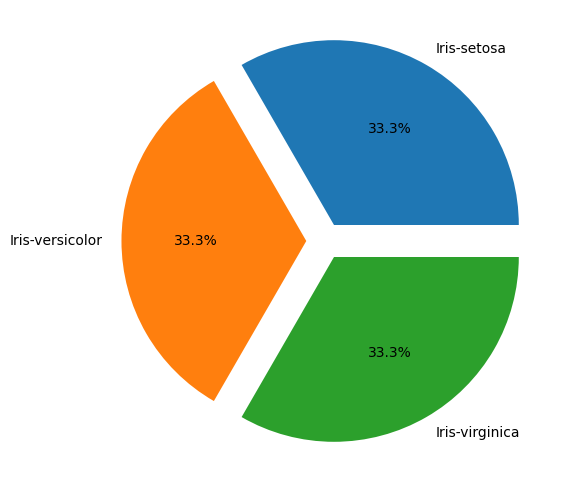

In [79]:
plt.figure(figsize=(8 , 6))
labels=["Iris-setosa" , "Iris-versicolor", 'Iris-virginica']
sizes=[df.Species.value_counts()[0] ,df.Species.value_counts()[1], df.Species.value_counts()[2]]
plt.pie(sizes, labels=labels , autopct='%1.1f%%', explode = (0.1, 0.1,0.1))
plt.show()

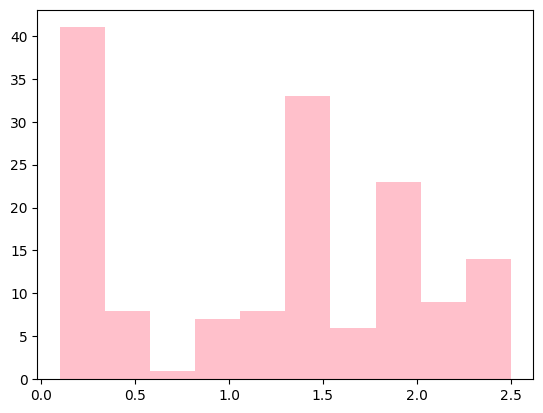

In [80]:
plt.hist(df['PetalWidthCm'], color='pink')
plt.show()

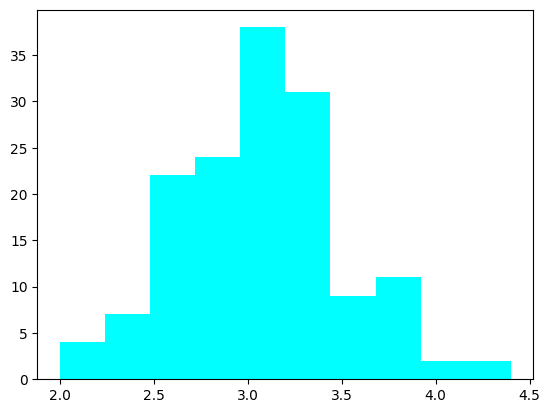

In [81]:
plt.hist(df['SepalWidthCm'], color='aqua')
plt.show()

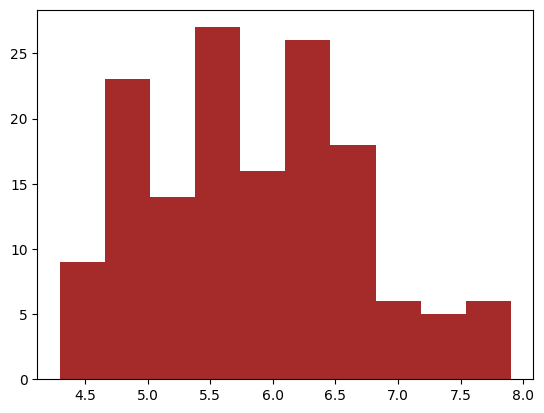

In [82]:
plt.hist(df['SepalLengthCm'], color = 'brown')
plt.show()

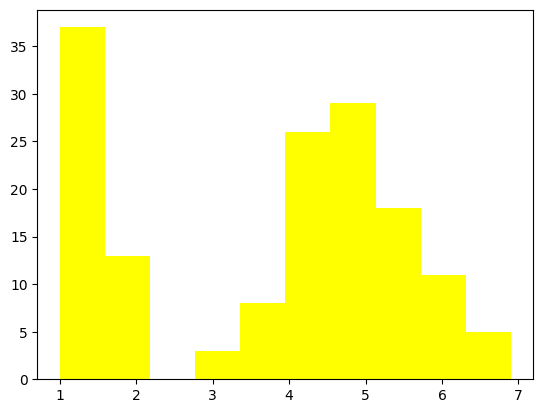

In [83]:
plt.hist(df['PetalLengthCm'], color='yellow')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [86]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
109,7.2,3.6,6.1,2.5
147,6.5,3.0,5.2,2.0
21,5.1,3.7,1.5,0.4
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
...,...,...,...,...
119,6.0,2.2,5.0,1.5
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
83,6.0,2.7,5.1,1.6


In [87]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
84,5.4,3.0,4.5,1.5
77,6.7,3.0,5.0,1.7
121,5.6,2.8,4.9,2.0
146,6.3,2.5,5.0,1.9
48,5.3,3.7,1.5,0.2
6,4.6,3.4,1.4,0.3
145,6.7,3.0,5.2,2.3
102,7.1,3.0,5.9,2.1
140,6.7,3.1,5.6,2.4
73,6.1,2.8,4.7,1.2


In [88]:
df.iloc[44]

SepalLengthCm            5.1
SepalWidthCm             3.8
PetalLengthCm            1.9
PetalWidthCm             0.4
Species          Iris-setosa
Name: 44, dtype: object

In [89]:
y_train

109     Iris-virginica
147     Iris-virginica
21         Iris-setosa
98     Iris-versicolor
68     Iris-versicolor
            ...       
119     Iris-virginica
87     Iris-versicolor
67     Iris-versicolor
83     Iris-versicolor
66     Iris-versicolor
Name: Species, Length: 120, dtype: object

In [90]:
y_test

84     Iris-versicolor
77     Iris-versicolor
121     Iris-virginica
146     Iris-virginica
48         Iris-setosa
6          Iris-setosa
145     Iris-virginica
102     Iris-virginica
140     Iris-virginica
73     Iris-versicolor
89     Iris-versicolor
62     Iris-versicolor
55     Iris-versicolor
103     Iris-virginica
54     Iris-versicolor
130     Iris-virginica
90     Iris-versicolor
148     Iris-virginica
0          Iris-setosa
122     Iris-virginica
70     Iris-versicolor
129     Iris-virginica
123     Iris-virginica
116     Iris-virginica
137     Iris-virginica
86     Iris-versicolor
71     Iris-versicolor
85     Iris-versicolor
3          Iris-setosa
65     Iris-versicolor
Name: Species, dtype: object

# TRAINING MODEL

In [91]:

from sklearn.metrics import accuracy_score
# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Gaussian Naive Bayes): {:.10f}%".format(accuracy * 100))

Accuracy (Gaussian Naive Bayes): 93.3333333333%


In [92]:
# Create and train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)

svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM): {:.13f}%".format(accuracy_svm * 100))


Accuracy (SVM): 96.6666666666667%


In [93]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=1)  # You can specify a random_state for reproducibility
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Decision Tree): {:.10f}%".format(accuracy * 100))


Accuracy (Decision Tree): 90.0000000000%


In [94]:
from sklearn.metrics import classification_report

# Assuming you have already trained the Naive Bayes model and made predictions (y_pred) as in the previous code snippet

# Generate and print the classification report without specifying target_names
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.90        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.90      0.90      0.90        30

